# Stochastik 
### Julian Nohl, Philippe Westenfelder
## A 1.11

#### 1.11.1
Geben Sie an, welche der Eigenschaften qualitativ, quantitativ, diskret, stetig auf das ebenfalls untersuchte Merkmal „Anzahl der Räder des Fahrzeugs“ zutrifft bzw. zutreffen. Begründen Sie Ihre Wahl (kurz).
#### **Antwort: Quantitativ, diskret, da Räder elemente der Natürlichen Zahlen sind**

In [195]:
import numpy as np

verbrauch_hersteller = [4.2, 3.9, 4.3, 4.1, 4.1]
verbrauch_test = [4.8, 4.1, 4.8, 4.5, 4.4]

#### 1.11.2

In [196]:
print("a) Mean:",np.mean(verbrauch_hersteller))
print("b) 0,25 Quartil", np.quantile(verbrauch_hersteller, 0.25))
print("   0,5 Quartil", np.quantile(verbrauch_hersteller, 0.5))
print("   0,75 Quartil", np.quantile(verbrauch_hersteller, 0.75))
print("c) 10%-Quantil", np.quantile(verbrauch_hersteller, 0.1))
print("d) Spannweite", np.max(verbrauch_hersteller) - np.min(verbrauch_hersteller))
print("e) Standardabweichung", np.std(verbrauch_hersteller, ddof=1))

a) Mean: 4.12
b) 0,25 Quartil 4.1
   0,5 Quartil 4.1
   0,75 Quartil 4.2
c) 10%-Quantil 3.98
d) Spannweite 0.3999999999999999
e) Standardabweichung 0.1483239697419133


#### 1.11.3
A) Was bedeutet der Wert der empirischen Standardabweichung (Ihr Ergebnis aus Aufgabe 1.11.2?)
für den Benzinverbrauch eines Autos (laut Hersteller)?  

**Antwort: Die Standardabweichung gibt an wie stark die Werte um den Mittelwert streuen.**

B) Alice interessiert sich dafür, inwieweit die Verbrauchsangaben der Hersteller und der im Test erzielte
Benzinverbrauch vergleichbar sind. Daher erstellt Sie folgende Grafik:  

**Antwort:**
- **Der Mittelwert der Herstellerangaben ist deutlicher kleiner als beim Testergebnis**
- **Die Standardabweichung der Herstellerangaben ist deutlich kleiner als beim Testergebnis**  

**Dieser Sachverhalt kann natürlich in der Realität nicht so vorkommen, da Autohersteller sich definitiv immer an ihre Angaben halten und niemals durch Test herausgekommen ist, dass sie bei diesen gelogen hätten vor allem bei VW (Ironie aus)**


**C) 0.961; Steigt die Herstellerangabe, steigt auch der Testwert. => keine negative Korrelation. Andere lassen sich ausschließen, da eine starke Korrelation vorliegt.**

In [197]:
print(np.corrcoef(verbrauch_hersteller, verbrauch_test)[1])

[0.96001567 1.        ]


Um abschätzen zu können, ob man aus der Herstellerangabe des Benzinverbrauchs das Testergebnis
ausrechnen kann, berechnet Alice die Regressionsgerade für die beiden Datensätze und erhält hierfür
das Bestimmtheitsmaß R
$R^{2} = 0.92$. Was bedeutet dieses? Ist die Anwendung der linearen Regression
hier sinnvoll und zulässig? Begründen Sie Ihre Meinung.
**Antwort: $R^{2}$ gibt an wie gut die Regression auf die Daten passt. Da $R^{2} = 0.92$ ist, passt die Regression sehr gut auf die Daten. Die Anwendung der linearen Regression ist hier sinnvoll und zulässig.**

#### 2.1

a) ${\Omega}$ = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
b) Nein, ${A \cap B = \emptyset}$
C) Ja, ${B \cap C = \{2\}$
D) $\overline{A}$ = gerade Zahlen
   $\overline{A} = {\Omega} \setminus B$ = {1, 3, 4, 5, ..., 10}
   $\overline{A} = {\Omega} \setminus C$ = {1, 4, 5, ..., 10}

#### 2.1.2
A) 1/10
B) 5/10 = 1/2
C) 8/10 = 4/5
D) 2/10 = 1/5 


#### 2.1.3
A) 1/10*1/10 = 1/100
B) 1 - 9/10*9/10 = 1 - 81/100 = 19/100
C) 3*(1/10) = 3/100 (1,3; 3,1; 2,2)
D) 3*(1/10) = 3/100 (10,10;10,9;9,10)


---

#### 1.14

### Dataset: Steam Games

Interessante Datenpunkte:
- Teuerstes Spiel
- Spiel mit den meisten DLCs
- Spiel mit den meisten Achievements
- Korrelation Preis/Spielzeit

In [198]:
import pandas as pd
import time
import locale
import matplotlib.pyplot as plt
from scipy import stats


lc = locale.setlocale(locale.LC_TIME, "en_US")

df = pd.read_csv("games.csv")
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [199]:
# release date zu timestamp (für korrelationen):
df["Release date (timestamp)"] = df["Release date"].apply(lambda x: int(time.mktime(time.strptime(x, "%b %d, %Y"))) if "," in x else int(time.mktime(time.strptime(x, "%b %Y"))))

In [200]:
def remove_outliers(raw, column, threshold=3):
    # Calculate the z-score for each student's height
    z = np.abs(stats.zscore(df[column]))
    
    # Identify outliers as students with a z-score greater than threshold
    outliers = raw[z > threshold]
    
    return raw.copy().drop(outliers.index)

df_price_avg_playtime = remove_outliers(df, "Price", threshold=1.2)
df_price_avg_playtime = remove_outliers(df_price_avg_playtime, "Average playtime forever")

# remove extreme outliers from avg playtime:

np.corrcoef(df_price_avg_playtime["Price"], df_price_avg_playtime["Average playtime forever"])[1][0]

/var/folders/4w/5w4v_g25369d8q51xj3j8py80000gn/T/ipykernel_53426/2182332633.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = raw[z > threshold]


0.1664172240267269

In [205]:
# data_source = df
data_source = df_price_avg_playtime

def get_standard_things(column):
    return {
        "mean": np.mean(column),
        "median": np.median(column),
        "std": np.std(column, ddof=1),
        "min": np.min(column),
        "max": np.max(column),
        "q1": np.quantile(column, 0.25),
        "q3": np.quantile(column, 0.75),
        "iqr": np.quantile(column, 0.75) - np.quantile(column, 0.25),
    }

def print_standard_things(columns):
    data = []
    
    for column in columns:
        data[column] = get_standard_things(column)
    
    default_stuff = pd.DataFrame([
        ["mean", [data[column] for column in columns]],
        ["median", [data[column] for column in columns]],
        ["std", [data[column] for column in columns]],
        ["min", [data[column] for column in columns]],
        ["max", [data[column] for column in columns]],
        ["q1", [data[column] for column in columns]],
        ["q3", [data[column] for column in columns]],
        ["iqr", [data[column] for column in columns]],
    ], columns=["", "Price", "Average Playtime Forever"])
    
    print(default_stuff.to_string(index=False))

print_standard_things(['Price', 'Average playtime forever'])

plt.xlabel('Price in $')
plt.ylabel('Playtime in h')
plt.scatter(data_source["Price"], data_source["Average playtime forever"], s=10, c=data_source["Average playtime forever"], cmap=plt.cm.get_cmap('jet'))


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U5'), dtype('<U5')) -> None

{'whiskers': [<matplotlib.lines.Line2D at 0x3209bca30>,
 'caps': [<matplotlib.lines.Line2D at 0x3209bcf70>,
 'boxes': [<matplotlib.lines.Line2D at 0x3209dc790>],
 'medians': [<matplotlib.lines.Line2D at 0x3209bd4b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3209bd9f0>],
 'means': [<matplotlib.lines.Line2D at 0x3209bd750>]}

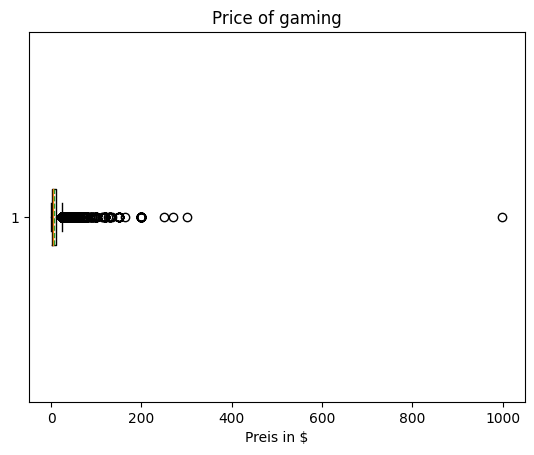

In [202]:
plt.title('Price of gaming')
plt.xlabel('Preis in $')
plt.boxplot([df['Price']], vert=False, showfliers=True, showmeans=True, meanline=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x32097b8e0>,
 'caps': [<matplotlib.lines.Line2D at 0x32097be20>,
 'boxes': [<matplotlib.lines.Line2D at 0x32097b640>],
 'medians': [<matplotlib.lines.Line2D at 0x3209483a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x3209488e0>],
 'means': [<matplotlib.lines.Line2D at 0x320948640>]}

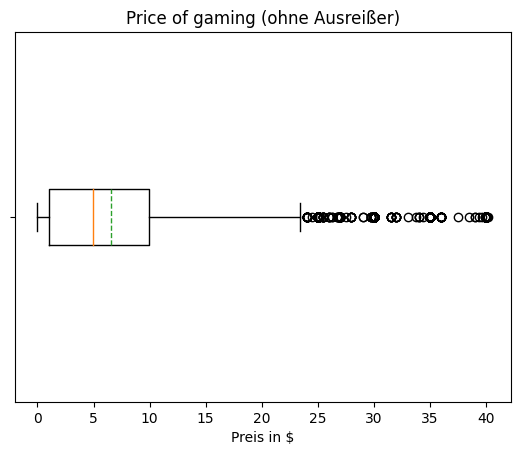

In [203]:
price_no_outliers = remove_outliers(df, "Price")

plt.title('Price of gaming (ohne Ausreißer)')
plt.xlabel('Preis in $')
plt.boxplot([price_no_outliers['Price']], vert=False, showfliers=True, showmeans=True, meanline=True, labels=[''])